# Imports

In [1]:
import torch
import torch.autograd as autograd
import cmd_utils
import potentials

# Testing Meta-Matrix Product

## Two Player Case

In [4]:
x_param = torch.tensor([1.0, 1.0], requires_grad=True)
y_param = torch.tensor([1.0, 1.0], requires_grad=True)

# x_loss = torch.dot(x_param, x_param) * torch.dot(y_param, y_param)
# y_loss =  - torch.dot(x_param, x_param) * torch.dot(y_param, y_param)

x_loss = torch.sum(torch.pow(x_param, 2)) * torch.sum(torch.pow(y_param, 2))
y_loss = - torch.sum(torch.pow(x_param, 2)) * torch.sum(torch.pow(y_param, 2))

b1 = torch.tensor([1.0, 1.0])
b2 = torch.tensor([1.0, 1.0])


result1 = cmd_utils.avp([x_loss, y_loss], [x_param, y_param], [b1, b2], 
                        bregman=potentials.squared_distance(1), 
                        transpose=False, 
                        retain_graph=True)
result2 = cmd_utils.avp([x_loss, y_loss], [x_param, y_param], [b1, b2], 
                        bregman=potentials.squared_distance(1), 
                        transpose=True, 
                        retain_graph=True)

print(result1)
print(result2)

[tensor([9., 9.]), tensor([-7., -7.])]
[tensor([-7., -7.]), tensor([9., 9.])]


#  Three Player Case


In [7]:
x_param = torch.tensor([1.0, 1.0], requires_grad=True)
y_param = torch.tensor([1.0, 1.0], requires_grad=True)
z_param = torch.tensor([1.0, 1.0], requires_grad=True)

# x_loss = torch.dot(x_param, x_param) * torch.dot(y_param, y_param)
# y_loss =  - torch.dot(x_param, x_param) * torch.dot(y_param, y_param)

x_loss = torch.sum(torch.pow(x_param, 3)) * torch.sum(torch.pow(y_param, 3)) * torch.sum(torch.pow(z_param, 3))
y_loss = torch.sum(torch.pow(x_param, 3)) * torch.sum(torch.pow(y_param, 3)) * torch.sum(torch.pow(z_param, 3))
z_loss = torch.sum(torch.pow(x_param, 3)) * torch.sum(torch.pow(y_param, 3)) * torch.sum(torch.pow(z_param, 3))

b = torch.tensor([[1.0, 1.0], [1.0, 1.0], [1.0, 1.0]])

result1 = cmd_utils.avp([x_loss, y_loss, z_loss], [x_param, y_param, z_param], b, 
                        bregman=potentials.squared_distance(1), 
                        transpose=False, 
                        retain_graph=True)
result2 = cmd_utils.avp([x_loss, y_loss, z_loss], [x_param, y_param, z_param], b, 
                        bregman=potentials.squared_distance(1), 
                        transpose=True, 
                        retain_graph=True)

print(result1)
print(result2)


[tensor([73., 73.]), tensor([73., 73.]), tensor([73., 73.])]
[tensor([73., 73.]), tensor([73., 73.]), tensor([73., 73.])]


# Testing Meta-Matrix Conjugate Gradient

We test in the two player case with the following objective functions. Since the two player case is the same as presented in the original CGD paper, this conjugate gradient should return the same result as calculated by hand from the closed form solution in the paper.


\begin{gather}
f(x,y) = x^2 y^2 \;\;\;\;\; g(x,y) = -x^2 y^2
\end{gather}

In [9]:
x = torch.tensor([1.0, 1.0], requires_grad=True)
y = torch.tensor([1.0, 1.0], requires_grad=True)

x_loss2 = torch.sum(torch.pow(x, 2)) * torch.sum(torch.pow(y, 2))
y_loss2 = - torch.sum(torch.pow(x, 2)) * torch.sum(torch.pow(y, 2))

soln, n_iter = cmd_utils.metamatrix_conjugate_gradient(
    [x_loss2, y_loss2], [x, y], bregman=potentials.squared_distance(1))

print(soln)
print(n_iter)


[tensor([-0.5538, -0.5538]), tensor([-0.4308, -0.4308])]
0


[tensor([0.1000], grad_fn=<DivBackward0>), tensor([0.1000], grad_fn=<DivBackward0>)]


<IPython.core.display.Javascript object>


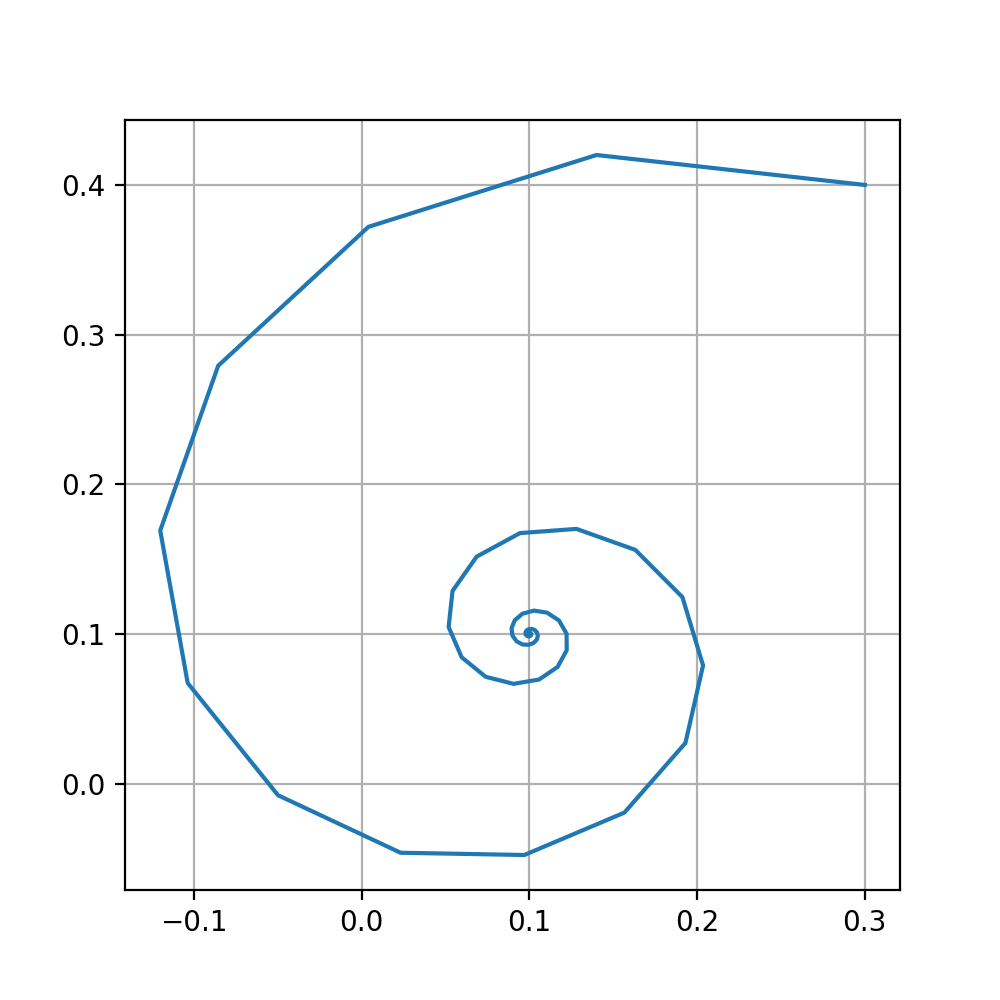

In [13]:
import matplotlib.pyplot as plt
%matplotlib notebook

x_param = torch.tensor([0.3], requires_grad=True)
y_param = torch.tensor([0.4], requires_grad=True)

alpha = 0.5
num_iter = 1000

param_list = [x_param, y_param]

x_player = []
y_player = []

def payoff_func(param_list):
    x_loss = alpha * (torch.sum(param_list[0]) - 0.1) * (torch.sum(param_list[1]) - 0.1)
    y_loss = - alpha * (torch.sum(param_list[0]) - 0.1) * (torch.sum(param_list[1]) - 0.1)
    
    return [x_loss, y_loss]

for n in range(num_iter):
    x_player.append(float(param_list[0].data[0]))
    y_player.append(float(param_list[1].data[0]))
    
    param_list = cmd_utils.step(param_list, payoff_func)
    
print(param_list)

plt.figure(figsize=(5,5))
plt.grid()
plt.plot(x_player, y_player)
plt.show()

